In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading datasets 
matches = pd.read_csv("matches.csv")
players = pd.read_csv("players.csv")
overball = pd.read_csv("overBallDetails.csv")
overhistory = pd.read_csv("overHistory.csv")
venues = pd.read_csv("venues.csv")
innings = pd.read_csv("innings.csv")
teams = pd.read_csv("teams.csv")

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_7328\2932811369.py:4: DtypeWarning: Columns (13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  overhistory = pd.read_csv("overHistory.csv")


### Treating missing values

In [4]:
#check data for missing values
missing = ["na", "--"]
data = pd.read_csv("matches.csv", na_values=missing)
data.isnull().sum()

id                 0
venueId            0
toss.elected     100
toss.winner      100
team1Id            0
                ... 
Unnamed: 169    1700
Unnamed: 170    1700
Unnamed: 171    1700
Unnamed: 172    1700
Unnamed: 173    1700
Length: 174, dtype: int64

In [5]:
#drop columns with majorchunks of data missing
columns_to_drop = ['matchStatus_victoryMarginRuns','matchStatus_victoryMarginWickets','matchStatus_victoryMarginInningsRuns','match.summary','matchStatus','umpire.name.5','Unnamed: 57','matchSummary','totalBalls','Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28','Unnamed: 29','Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33','Unnamed: 34','Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38','Unnamed: 39','Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43','Unnamed: 44','Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48','Unnamed: 49','Unnamed: 50', 'Unnamed: 51', 'Unnamed: 52', 'Unnamed: 53','Unnamed: 54','Unnamed: 55', 'Unnamed: 56', 'Unnamed: 58', 'Unnamed: 59','Unnamed: 60','Unnamed: 61', 'Unnamed: 62', 'Unnamed: 63', 'Unnamed: 64','Unnamed: 65','Unnamed: 66', 'Unnamed: 67', 'Unnamed: 68', 'Unnamed: 69','Unnamed: 70','Unnamed: 71', 'Unnamed: 72', 'Unnamed: 73', 'Unnamed: 74','Unnamed: 75','Unnamed: 76', 'Unnamed: 77', 'Unnamed: 78', 'Unnamed: 79','Unnamed: 80','Unnamed: 81', 'Unnamed: 82', 'Unnamed: 83', 'Unnamed: 84','Unnamed: 85','Unnamed: 86', 'Unnamed: 87', 'Unnamed: 88', 'Unnamed: 89','Unnamed: 90','Unnamed: 91', 'Unnamed: 92', 'Unnamed: 93', 'Unnamed: 94','Unnamed: 95','Unnamed: 96', 'Unnamed: 97', 'Unnamed: 98', 'Unnamed: 99','Unnamed: 100','Unnamed: 101', 'Unnamed: 102', 'Unnamed: 103', 'Unnamed: 104','Unnamed: 105','Unnamed: 106', 'Unnamed: 107', 'Unnamed: 108', 'Unnamed: 109','Unnamed: 110','Unnamed: 111', 'Unnamed: 112', 'Unnamed: 113', 'Unnamed: 114','Unnamed: 115','Unnamed: 116', 'Unnamed: 117', 'Unnamed: 118', 'Unnamed: 119','Unnamed: 120','Unnamed: 121', 'Unnamed: 122', 'Unnamed: 123', 'Unnamed: 124','Unnamed: 125','Unnamed: 126', 'Unnamed: 127', 'Unnamed: 128', 'Unnamed: 129','Unnamed: 130','Unnamed: 131', 'Unnamed: 132', 'Unnamed: 133', 'Unnamed: 134','Unnamed: 135','Unnamed: 136', 'Unnamed: 137', 'Unnamed: 138', 'Unnamed: 139','Unnamed: 140','Unnamed: 141', 'Unnamed: 142', 'Unnamed: 143', 'Unnamed: 144','Unnamed: 145','Unnamed: 146', 'Unnamed: 147', 'Unnamed: 148', 'Unnamed: 149','Unnamed: 150','Unnamed: 151', 'Unnamed: 152', 'Unnamed: 153','Unnamed: 154', 'Unnamed: 155', 'Unnamed: 156','Unnamed: 157','Unnamed: 158','Unnamed: 159','Unnamed: 160','Unnamed: 161','Unnamed: 162','Unnamed: 163','Unnamed: 164','Unnamed: 165','Unnamed: 166','Unnamed: 167','Unnamed: 168','Unnamed: 169','Unnamed: 170','Unnamed: 171','Unnamed: 172','Unnamed: 173']
matches.drop(columns=columns_to_drop, axis=1, inplace=True)
missing_data = ['matchStatus_text','matchEndDate','matchDateMs'] 
matches.dropna(subset = missing_data, inplace=True)
players.drop('dateOfBirth',axis=1, inplace=True)
players.dropna(subset=['nationality'], inplace=True)
players['bowlingStyle'].fillna('none',inplace=True)
overball.dropna(inplace=True)
columns_to_drop = ['ovBalls/6','ovBalls/7','ovBalls/8','ovBalls/9','ovBalls/10','ovBalls/11','ovBalls/12','ovBalls/13','bowlerId']
overhistory.drop(columns=columns_to_drop, axis=1, inplace=True)
venues.dropna(inplace=True)
columns_to_drop = ['battingTeamId','bowlingTeamId']
innings.drop(columns=columns_to_drop, axis=1, inplace=True)
teams.dropna(inplace=True)

In [6]:
#impute columns
#for categorical columns
matches['matchStatus_outcome'].fillna('unknown',inplace=True)
matches['toss.elected'].fillna(matches['toss.elected'].mode()[0],inplace=True)
matches['toss.winner'].fillna(matches['toss.winner'].mode()[0],inplace=True)
#for numerical columns
matches['matchEndDateMs'].fillna(matches['matchEndDateMs'].median(),inplace=True)
#smoothing out descrepencies
corrections = {'PK': 'Pakistani ', 'IN': 'Indian','ENG' : 'English','SCO' : 'Scottish','BD': 'Bangladeshi','NP' : 'Nepalese','Pakistani':'Pakistani'}
players['nationality'].replace(corrections, inplace=True)
corrections = {'ENG':'English','Pakistani':'Pakistani'}
players['nationality'].replace(corrections, inplace=True)
overhistory['ovBalls/1'].fillna(overhistory['ovBalls/1'].mode()[0],inplace=True)
overhistory['ovBalls/2'].fillna(overhistory['ovBalls/2'].mode()[0],inplace=True)
overhistory['ovBalls/3'].fillna(overhistory['ovBalls/3'].mode()[0],inplace=True)
overhistory['ovBalls/4'].fillna(overhistory['ovBalls/4'].mode()[0],inplace=True)
overhistory['ovBalls/5'].fillna(overhistory['ovBalls/4'].mode()[0],inplace=True)

### Changing Datatype


In [7]:
#changing datatype
overball['bowlerId'] = overball['bowlerId'].astype('int64')
overball['facingBatsmanId'] = overball['facingBatsmanId'].astype('int64')
teams['wicketKeeperId'] = teams['wicketKeeperId'].astype('int64')
teams['captainId'] = teams['captainId'].astype('int64')

### Data visualisation

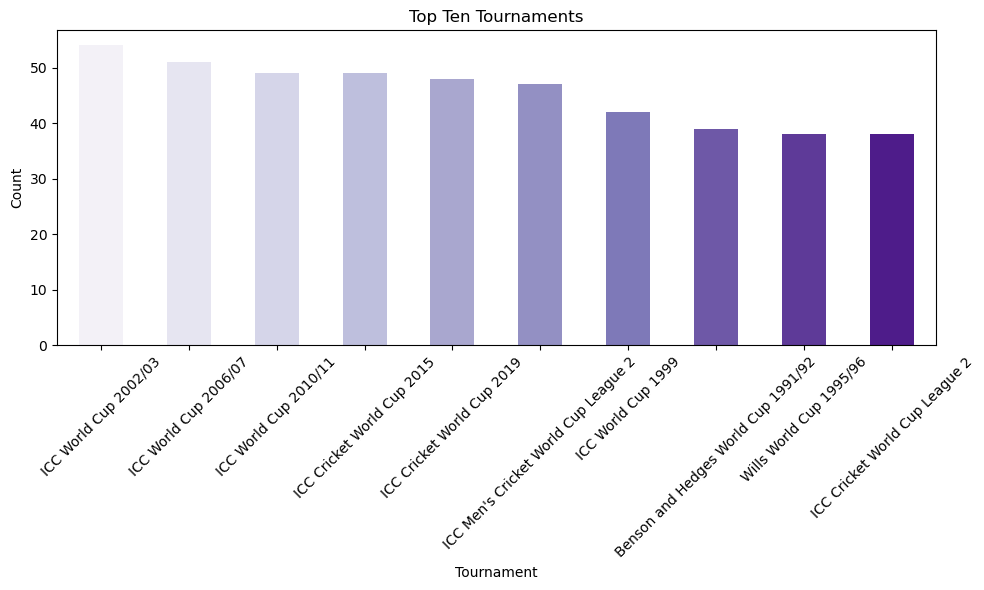

In [8]:
# Get the top ten tournaments by value counts
top_10_tournaments = matches['tournamentLabel'].value_counts().head(10)

# Define a color palette from Seaborn
palette = sns.color_palette('Purples', 10)  # Using the 'viridis' palette with 10 colors

# Plotting the top ten tournaments as a bar plot with a single color palette
plt.figure(figsize=(10, 6))
top_10_tournaments.plot(kind='bar', color=palette)
plt.title('Top Ten Tournaments')
plt.xlabel('Tournament')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [9]:
#merging or joining_tables
matches_venues=pd.merge(matches,venues,left_on='venueId',right_on='id',how='inner')
matches_innings=pd.merge(matches,innings,left_on='id',right_on='matchId',how='inner')

In [10]:
duplicates = matches_venues[matches_venues.duplicated()]
num_rows = len(duplicates)
print("Number of rows in the duplicates:", num_rows)

Number of rows in the duplicates: 0


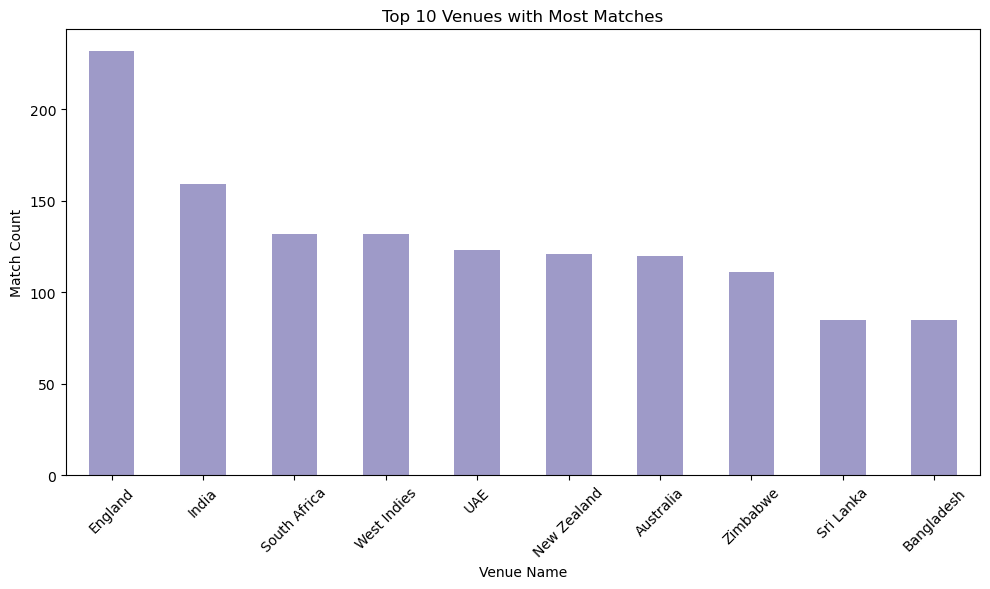

In [11]:
#Data visualisation 
#top 10 venues by match count
venue_match_counts = matches_venues['country'].value_counts().head(10)

# Define a blue color palette from Seaborn with a single shade
blue_palette = sns.color_palette('Purples', 1)

# Plotting the top 10 venues with a single blue color
plt.figure(figsize=(10, 6))
venue_match_counts.plot(kind='bar', color=blue_palette)
plt.title('Top 10 Venues with Most Matches')
plt.xlabel('Venue Name')
plt.ylabel('Match Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

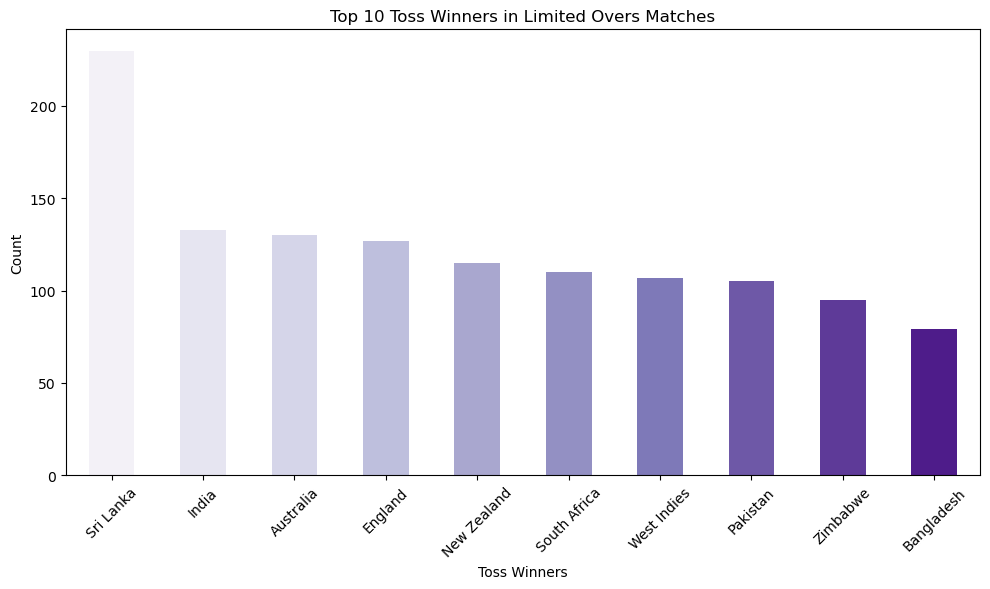

In [12]:

limited_overs_matches = matches_venues[matches_venues['isLimitedOvers'] == True]

# Calculate the top 10 toss winners in limited overs matches
top_10_toss_winners = limited_overs_matches['toss.winner'].value_counts().head(10)

# Create a color palette with different shades of a single color
colors = sns.color_palette('Purples', n_colors=len(top_10_toss_winners))

# Plotting the top 10 toss winners in limited overs matches with different shades
plt.figure(figsize=(10, 6))
top_10_toss_winners.plot(kind='bar', color=colors)
plt.title('Top 10 Toss Winners in Limited Overs Matches')
plt.xlabel('Toss Winners')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

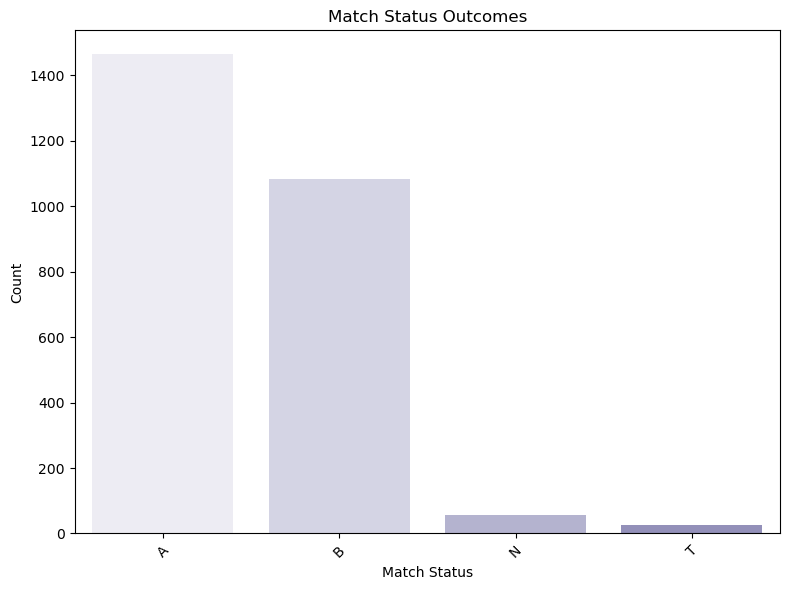

In [13]:
# Calculate the match status outcomes
#A: matches won,B: bowled out , N: No results, T: ended in a tie
match_status = matches_innings['matchStatus_outcome'].value_counts()

# Define a purple color palette from Seaborn
custom_palette = sns.color_palette('Purples')  

# Convert the color palette to a list of colors
custom_colors = list(custom_palette)

# Plotting the distribution of match status outcomes with custom colors
plt.figure(figsize=(8, 6))
sns.barplot(x=match_status.index, y=match_status.values, palette=custom_colors)
plt.title('Match Status Outcomes')
plt.xlabel('Match Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

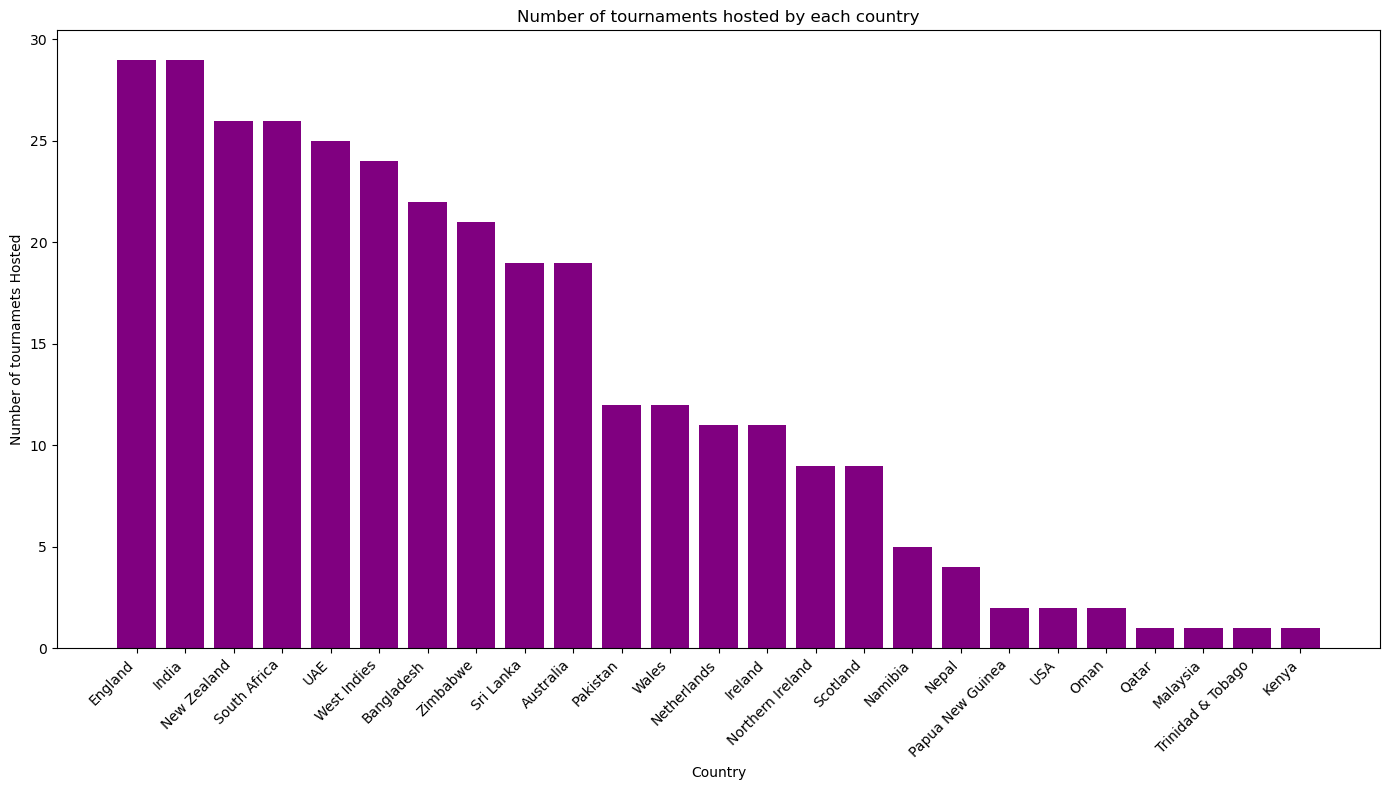

In [16]:
#Tournaments hosted by each country 
tournaments_host=matches_venues.groupby('country')['tournamentLabel'].nunique().reset_index()
tournaments_host=tournaments_host.sort_values(by='tournamentLabel',ascending=False)
#visualization
plt.figure(figsize=(14,8))
plt.bar(tournaments_host['country'],tournaments_host['tournamentLabel'],color='Purple')
plt.title("Number of tournaments hosted by each country")
plt.xlabel('Country')
plt.ylabel('Number of tournamets Hosted')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show()

In [17]:
players_innings=pd.merge(players,innings,left_on='id',right_on='matchId',how='inner')

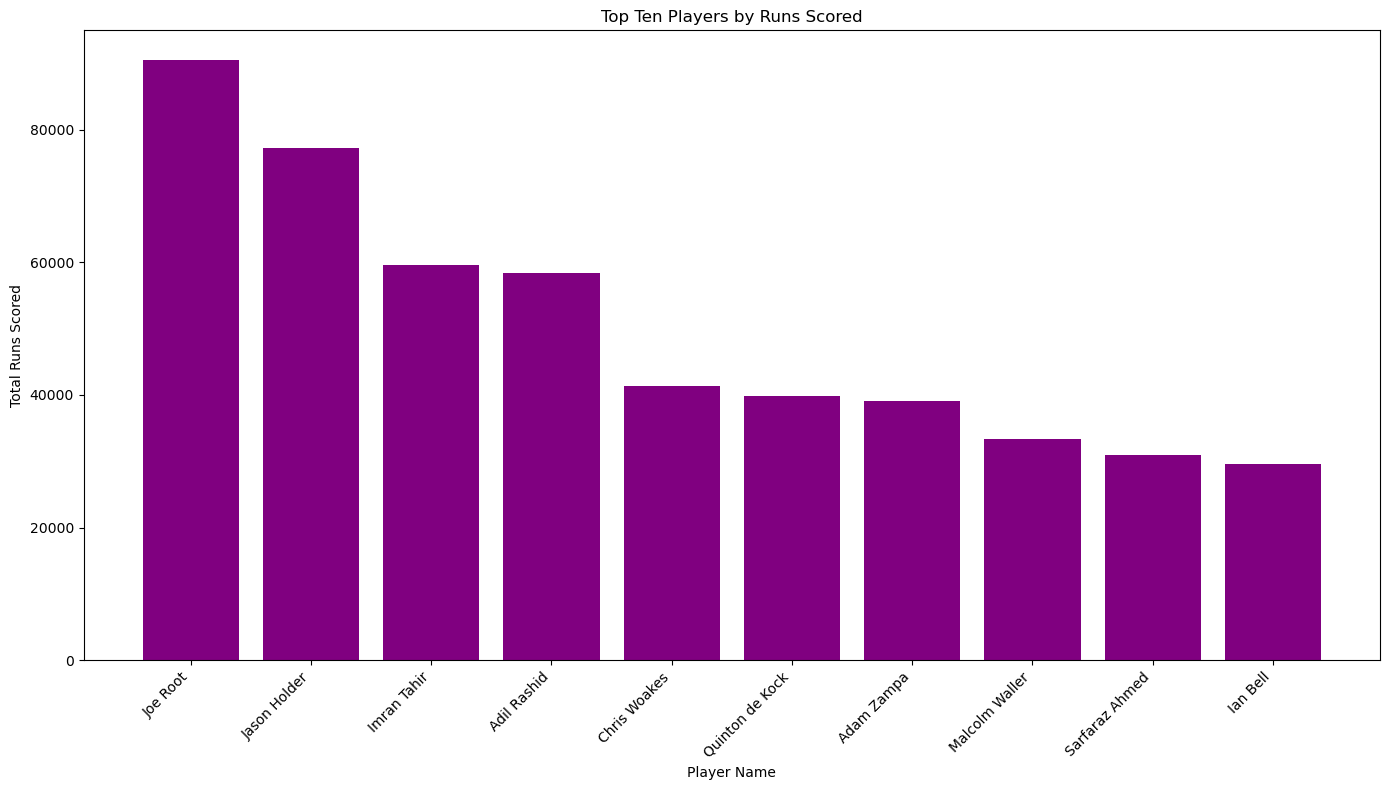

In [18]:
#Top ten players by runs score
# Get the top ten players by runs scored
top_players_runs = players_innings.groupby('fullName')['runs'].sum().nlargest(10).reset_index()

# Visualization: Plotting the top ten players by runs scored
plt.figure(figsize=(14, 8))
plt.bar(top_players_runs['fullName'], top_players_runs['runs'], color='purple')
plt.title("Top Ten Players by Runs Scored")
plt.xlabel('Player Name')
plt.ylabel('Total Runs Scored')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
